## Import necessary modules

In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

import warnings
warnings.filterwarnings('ignore')

## Data Exploration

### Load datasets into a single DataFrame

In [ ]:
# Specify the columns to read
columns_to_read = ['STATE', 'STATENAME', 'LATITUDE', 'LONGITUD', 'LGT_COND', 'LGT_CONDNAME',
                   'WEATHER', 'WEATHERNAME', 'FATALS', 'MONTHNAME', 'DAY', 'DAY_WEEKNAME', 'MONTH',
                   'HOUR', 'HOURNAME', 'MINUTE', 'DAY_WEEKNAME', 'RUR_URBNAME', 'TYP_INTNAME']

# Get the list of CSV files in the directory
datasets = glob.glob("*.csv")

# Concatenate all CSV files into a single DataFrame
dfs = []
for file in datasets:
    try:
        df = pd.read_csv(file, usecols=columns_to_read, encoding='latin-1')
        # Rename column from 'LONGITUD' to 'LONGITUDE'
        df.rename(columns={'LONGITUD': 'LONGITUDE'}, inplace=True)
        dfs.append(df)
    except UnicodeDecodeError:
        print(f"Error reading file: {file}")

# Concatenate DataFrames
dfs = pd.concat(dfs, ignore_index=True)
df = dfs.copy()
df

,STATE,STATENAME,MONTH,MONTHNAME,DAY,DAY_WEEKNAME,HOUR,HOURNAME,MINUTE,RUR_URBNAME,LATITUDE,LONGITUDE,TYP_INTNAME,LGT_COND,LGT_CONDNAME,WEATHER,WEATHERNAME,FATALS
0,1,Alabama,2,February,12,Friday,22,10:00pm-10:59pm,10,Urban,33.601642,-86.312383,Not an Intersection,2,Dark - Not Lighted,2,Rain,2
1,1,Alabama,2,February,11,Thursday,18,6:00pm-6:59pm,0,Urban,33.541361,-86.643744,Not an Intersection,2,Dark - Not Lighted,2,Rain,2
2,1,Alabama,2,February,7,Sunday,0,0:00am-0:59am,20,Urban,33.419797,-86.752572,Not an Intersection,2,Dark - Not Lighted,2,Rain,1
3,1,Alabama,2,February,3,Wednesday,16,4:00pm-4:59pm,20,Urban,33.360894,-86.777139,Not an Intersection,1,Daylight,1,Clear,1
4,1,Alabama,1,January,30,Saturday,22,10:00pm-10:59pm,20,Rural,33.815208,-86.825342,Not an Intersection,2,Dark - Not Lighted,10,Cloudy,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177404,56,Wyoming,9,September,28,Saturday,18,6:00pm-6:59pm,30,Rural,44.354406,-104.810853,Not an Intersection,5,Dusk,6,Severe Crosswinds,1
177405,56,Wyoming,9,September,30,Monday,13,1:00pm-1:59pm,3,Rural,41.167136,-105.887706,T-Intersection,1,Daylight,1,Clear,1
177406,56,Wyoming,9,September,22,Sunday,15,3:00pm-3:59pm,30,Rural,44.912142,-107.104503,Not an Intersection,1,Daylight,1,Clear,1
177407,56,Wyoming,9,September,22,Sunday,4,4:00am-4:59am,30,Rural,41.403750,-104.456917,Not an Intersection,2,Dark - Not Lighted,1,Clear,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177409 entries, 0 to 177408
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   STATE         177409 non-null  int64  
 1   STATENAME     177409 non-null  object 
 2   MONTH         177409 non-null  int64  
 3   MONTHNAME     177409 non-null  object 
 4   DAY           177409 non-null  int64  
 5   DAY_WEEKNAME  177409 non-null  object 
 6   HOUR          177409 non-null  int64  
 7   HOURNAME      177409 non-null  object 
 8   MINUTE        177409 non-null  int64  
 9   RUR_URBNAME   177409 non-null  object 
 10  LATITUDE      177409 non-null  float64
 11  LONGITUDE     177409 non-null  float64
 12  TYP_INTNAME   177409 non-null  object 
 13  LGT_COND      177409 non-null  int64  
 14  LGT_CONDNAME  177409 non-null  object 
 15  WEATHER       177409 non-null  int64  
 16  WEATHERNAME   177409 non-null  object 
 17  FATALS        177409 non-null  int64  
dtypes: f

### Checking accuracy of encoded values

In [ ]:
df.LGT_CONDNAME.unique()

array(['Dark - Not Lighted', 'Daylight', 'Dark - Lighted', 'Dawn', 'Dusk',
       'Dark - Unknown Lighting', 'Reported as Unknown', 'Not Reported',
       'Other', 'Unknown'], dtype=object)

In [ ]:
# Define a dictionary to map numerical codes to their corresponding descriptions
lgt_cond_mapping = {
    1: 'Daylight',
    2: 'Dark - Not Lighted',
    3: 'Dark - Lighted',
    4: 'Dawn',
    5: 'Dusk',
    6: 'Dark - Unknown Lighting',
    7: 'Other',
    8: 'Not Reported',
    9: 'Unknown'  # Combine both 'Reported as Unknown' and 'Unknown'
}

# Map 'LGT_COND' column using the lgt_cond_mapping dictionary
df['LGT_COND_DESCRIPTION'] = df['LGT_COND'].map(lgt_cond_mapping)

# Check if either 'Reported as Unknown' or 'Unknown' matches
if (((df['LGT_CONDNAME'] == 'Reported as Unknown') | (df['LGT_CONDNAME'] == 'Unknown')) &
     (df['LGT_COND_DESCRIPTION'] == 'Unknown')).any():
    print('Encoding of LGT_CONDNAME into LGT_COND is accurate.')
else:
    print('Encoding of LGT_CONDNAME into LGT_COND is inaccurate.')

Encoding of LGT_CONDNAME into LGT_COND is accurate.


In [ ]:
df.WEATHERNAME.unique()

array(['Rain', 'Clear', 'Cloudy', 'Fog, Smog, Smoke',
       'Reported as Unknown', 'Severe Crosswinds', 'Snow', 'Not Reported',
       'Freezing Rain or Drizzle', 'Other', 'Blowing Sand, Soil, Dirt',
       'Blowing Snow', 'Sleet or Hail', 'Unknown'], dtype=object)

In [ ]:
# Define weather mapping dictionary
weather_mapping = {
    1: 'Clear',
    2: 'Rain',
    3: 'Sleet or Hail',
    4: 'Snow',
    5: 'Fog, Smog, Smoke',
    6: 'Severe Crosswinds',
    7: 'Blowing Sand, Soil, Dirt',
    8: 'Other',
    10: 'Cloudy',
    11: 'Blowing Snow',
    12: 'Freezing Rain or Drizzle',
    98: 'Not Reported',
    99: 'Unknown'  # Combine both 'Reported as Unknown' and 'Unknown'
}

# Map WEATHER column using the weather_mapping dictionary
df['WEATHER_DESCRIPTION'] = df['WEATHER'].map(weather_mapping)

# Check if 'WEATHERNAME' matches 'WEATHER_DESCRIPTION' for 'Reported as Unknown' or 'Unknown'
if (((df['WEATHERNAME'] == 'Reported as Unknown') | (df['WEATHERNAME'] == 'Unknown')) &
     (df['WEATHER_DESCRIPTION'] == 'Unknown')).any():
    print('Encoding of WEATHERNAME into WEATHER is accurate.')
else:
    print('Encoding of WEATHERNAME into WEATHER is inaccurate.')

Encoding of WEATHERNAME into WEATHER is accurate.


### Checking counts

In [ ]:
# Considering the possibility of deleting certain data points
weather_counts = df['WEATHERNAME'].value_counts()
print(weather_counts)
print()

lgt_cond_counts = df['LGT_CONDNAME'].value_counts()
print(lgt_cond_counts)



WEATHERNAME
Clear                       122993
Cloudy                       24697
Rain                         13089
Not Reported                 11172
Fog, Smog, Smoke              2022
Snow                          1631
Reported as Unknown            678
Severe Crosswinds              288
Sleet or Hail                  222
Other                          169
Freezing Rain or Drizzle       145
Blowing Snow                   134
Unknown                        118
Blowing Sand, Soil, Dirt        51
Name: count, dtype: int64

LGT_CONDNAME
Daylight                   82416
Dark - Not Lighted         48472
Dark - Lighted             36289
Dusk                        4248
Dawn                        3352
Dark - Unknown Lighting     1500
Reported as Unknown          623
Not Reported                 286
Unknown                      133
Other                         90
Name: count, dtype: int64


In [ ]:
# Define the conditions
condition_1 = df['WEATHERNAME'].isin(['Not Reported', 'Reported as Unknown', 'Other', 'Unknown'])
condition_2 = df['LGT_CONDNAME'].isin(['Dark - Unknown Lighting', 'Reported as Unknown', 'Not Reported', 'Other', 'Unknown'])

# Count rows satisfying each condition
condition_1_count = condition_1.sum()
condition_2_count = condition_2.sum()

# Count rows that satisfy either condition
either_condition_count = (condition_1 | condition_2).sum()

print('Rows satisfying Condition 1:', condition_1_count)
print('Rows satisfying Condition 2:', condition_2_count)
print('Rows satisfying either condition:', either_condition_count)

Rows satisfying Condition 1: 12137
Rows satisfying Condition 2: 2632
Rows satisfying either condition: 13725


## Data Cleaning

### Missing values

In [ ]:
df.isnull().sum()

STATE                   0
STATENAME               0
MONTH                   0
MONTHNAME               0
DAY                     0
DAY_WEEKNAME            0
HOUR                    0
HOURNAME                0
MINUTE                  0
RUR_URBNAME             0
LATITUDE                0
LONGITUDE               0
TYP_INTNAME             0
LGT_COND                0
LGT_CONDNAME            0
WEATHER                 0
WEATHERNAME             0
FATALS                  0
LGT_COND_DESCRIPTION    0
WEATHER_DESCRIPTION     0
dtype: int64

In [ ]:
# Create a mask to select rows that do not satisfy either condition above
mask = ~(condition_1 | condition_2)

# Filter the DataFrame to keep only rows that do not satisfy either condition
df = df[mask]

df

,STATE,STATENAME,MONTH,MONTHNAME,DAY,DAY_WEEKNAME,HOUR,HOURNAME,MINUTE,RUR_URBNAME,LATITUDE,LONGITUDE,TYP_INTNAME,LGT_COND,LGT_CONDNAME,WEATHER,WEATHERNAME,FATALS,LGT_COND_DESCRIPTION,WEATHER_DESCRIPTION
0,1,Alabama,2,February,12,Friday,22,10:00pm-10:59pm,10,Urban,33.601642,-86.312383,Not an Intersection,2,Dark - Not Lighted,2,Rain,2,Dark - Not Lighted,Rain
1,1,Alabama,2,February,11,Thursday,18,6:00pm-6:59pm,0,Urban,33.541361,-86.643744,Not an Intersection,2,Dark - Not Lighted,2,Rain,2,Dark - Not Lighted,Rain
2,1,Alabama,2,February,7,Sunday,0,0:00am-0:59am,20,Urban,33.419797,-86.752572,Not an Intersection,2,Dark - Not Lighted,2,Rain,1,Dark - Not Lighted,Rain
3,1,Alabama,2,February,3,Wednesday,16,4:00pm-4:59pm,20,Urban,33.360894,-86.777139,Not an Intersection,1,Daylight,1,Clear,1,Daylight,Clear
4,1,Alabama,1,January,30,Saturday,22,10:00pm-10:59pm,20,Rural,33.815208,-86.825342,Not an Intersection,2,Dark - Not Lighted,10,Cloudy,1,Dark - Not Lighted,Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177404,56,Wyoming,9,September,28,Saturday,18,6:00pm-6:59pm,30,Rural,44.354406,-104.810853,Not an Intersection,5,Dusk,6,Severe Crosswinds,1,Dusk,Severe Crosswinds
177405,56,Wyoming,9,September,30,Monday,13,1:00pm-1:59pm,3,Rural,41.167136,-105.887706,T-Intersection,1,Daylight,1,Clear,1,Daylight,Clear
177406,56,Wyoming,9,September,22,Sunday,15,3:00pm-3:59pm,30,Rural,44.912142,-107.104503,Not an Intersection,1,Daylight,1,Clear,1,Daylight,Clear
177407,56,Wyoming,9,September,22,Sunday,4,4:00am-4:59am,30,Rural,41.403750,-104.456917,Not an Intersection,2,Dark - Not Lighted,1,Clear,1,Dark - Not Lighted,Clear


### Duplicates

In [ ]:
# Check for duplicate rows where all columns match
duplicate_rows = df[df.duplicated(keep=False)]

# Check if there are any duplicate rows
if not duplicate_rows.empty:
    print('Duplicate rows found:')
    print()
    print(duplicate_rows)
    print()

    # Delete duplicate rows
    df.drop_duplicates(keep=False, inplace=True)

    print('Duplicate rows deleted.')
else:
    print('No duplicate rows found.')

Duplicate rows found:

        STATE   STATENAME  MONTH MONTHNAME  DAY DAY_WEEKNAME  HOUR  \
33356      48       Texas      3     March   14       Sunday     0   
33359      48       Texas      3     March   14       Sunday     0   
63919      40    Oklahoma     12  December    7       Friday    18   
63920      40    Oklahoma     12  December    7       Friday    18   
148896      6  California      8    August    4       Sunday    21   
149085      6  California      8    August    4       Sunday    21   
155646     17    Illinois      7      July   25     Thursday     3   
155698     17    Illinois      7      July   25     Thursday     3   
156377     18     Indiana      4     April   27     Saturday     8   
156382     18     Indiana      4     April   27     Saturday     8   

             HOURNAME  MINUTE RUR_URBNAME   LATITUDE   LONGITUDE  \
33356   0:00am-0:59am      35       Rural  32.772017  -95.035517   
33359   0:00am-0:59am      35       Rural  32.772017  -95.035517   
63

### Unwanted columns

In [ ]:
# List of columns to delete
columns_to_delete = ['MONTHNAME', 'DAY', 'DAY_WEEKNAME', 'HOURNAME',
                     'MINUTE', 'LGT_COND_DESCRIPTION', 'WEATHER_DESCRIPTION']

# Drop the specified columns and reset the row indices
df = df.drop(columns=columns_to_delete)

df

,STATE,STATENAME,MONTH,HOUR,RUR_URBNAME,LATITUDE,LONGITUDE,TYP_INTNAME,LGT_COND,LGT_CONDNAME,WEATHER,WEATHERNAME,FATALS
0,1,Alabama,2,22,Urban,33.601642,-86.312383,Not an Intersection,2,Dark - Not Lighted,2,Rain,2
1,1,Alabama,2,18,Urban,33.541361,-86.643744,Not an Intersection,2,Dark - Not Lighted,2,Rain,2
2,1,Alabama,2,0,Urban,33.419797,-86.752572,Not an Intersection,2,Dark - Not Lighted,2,Rain,1
3,1,Alabama,2,16,Urban,33.360894,-86.777139,Not an Intersection,1,Daylight,1,Clear,1
4,1,Alabama,1,22,Rural,33.815208,-86.825342,Not an Intersection,2,Dark - Not Lighted,10,Cloudy,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177404,56,Wyoming,9,18,Rural,44.354406,-104.810853,Not an Intersection,5,Dusk,6,Severe Crosswinds,1
177405,56,Wyoming,9,13,Rural,41.167136,-105.887706,T-Intersection,1,Daylight,1,Clear,1
177406,56,Wyoming,9,15,Rural,44.912142,-107.104503,Not an Intersection,1,Daylight,1,Clear,1
177407,56,Wyoming,9,4,Rural,41.403750,-104.456917,Not an Intersection,2,Dark - Not Lighted,1,Clear,1


### Outliers

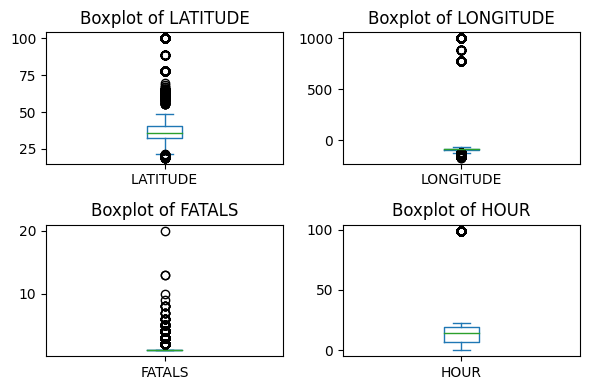

Summary Statistics of Numerical Columns:
            LATITUDE      LONGITUDE         FATALS           HOUR
count  163674.000000  163674.000000  163674.000000  163674.000000
mean       36.460595     -89.947934       1.086672      13.472005
std         6.076010      57.172713       0.353167       9.448836
min        19.035111    -170.514936       1.000000       0.000000
25%        32.790927     -98.357303       1.000000       7.000000
50%        35.755033     -88.128903       1.000000      14.000000
75%        40.468333     -81.940803       1.000000      19.000000
max        99.999900     999.999900      20.000000      99.000000

Potential outliers in LATITUDE:
         LATITUDE
886     60.498161
887     61.217603
888     61.188242
889     66.897883
890     57.796458
...           ...
176001  99.999900
176159  99.999900
176441  99.999900
176493  99.999900
176494  99.999900

[968 rows x 1 columns]

Potential outliers in LONGITUDE:
         LONGITUDE
886    -149.370700
887    -149.824525
8

In [ ]:
# Define numerical columns to investigate
numerical_columns = ['LATITUDE', 'LONGITUDE', 'FATALS', 'HOUR']

# Plot separate boxplots for each numerical column
plt.figure(figsize=(6, 4))

for i, column in enumerate(numerical_columns, start=1):
    plt.subplot(2, 2, i)
    df[column].plot(kind='box')
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

# Summary statistics
summary_statistics = df[numerical_columns].describe()
print('Summary Statistics of Numerical Columns:')
print(summary_statistics)
print()

# Identify potential outliers based on IQR
Q1 = summary_statistics.loc['25%']
Q3 = summary_statistics.loc['75%']
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print potential outliers for each numerical column
for column in numerical_columns:
    outliers = df[(df[column] < lower_bound[column]) | (df[column] > upper_bound[column])]
    if not outliers.empty:
        print(f'Potential outliers in {column}:')
        print(outliers[[column]])
    else:
        print(f'No potential outliers found in {column}.')
    print()


In [ ]:
# Delete outliers in HOUR column
df = df[df['HOUR'].between(0, 24)]

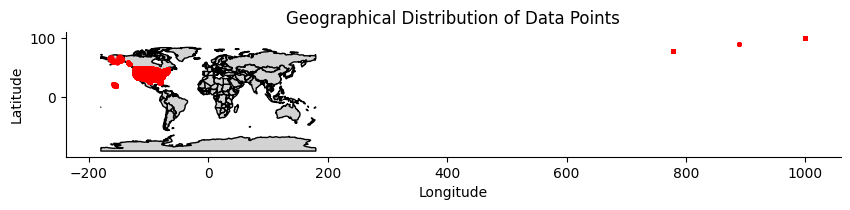

In [ ]:
# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a GeoDataFrame from your DataFrame with longitude and latitude
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.LONGITUDE, df.LATITUDE))

# Plot the world map
world.plot(figsize=(10, 8), color='lightgrey', edgecolor='black')

# Plot the data points on top of the map
gdf.plot(ax=plt.gca(), color='red', markersize=5, alpha=1)

# Customize plot
plt.title('Geographical Distribution of Data Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the map
plt.show()

In [ ]:
# Delete outliers in LONGITUDE and LATITUDE columns
# Goal: To correspond with actual USA LONG & LAT

df = df[(df['LONGITUDE'] <= 0) &
        (df['LATITUDE'] >= 18) & (df['LATITUDE'] <= 75)]

## Feature Engineering

### Time of day

In [ ]:
# Function to categorize hour into time of day
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 20:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create a new column
df['TIME_OF_DAY'] = df['HOUR'].apply(categorize_time_of_day)

df[['HOUR', 'TIME_OF_DAY']].tail(6)

,HOUR,TIME_OF_DAY
177403,3,Night
177404,18,Evening
177405,13,Afternoon
177406,15,Afternoon
177407,4,Night
177408,23,Night


### NHTSA Regions

In [ ]:
# Define NHTSA regions

nhtsa_regions = {
    'Region 1':  ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont'],
    'Region 2':  ['New Jersey', 'New York', 'Puerto Rico', 'Virgin Islands'],
    'Region 3':  ['Delaware', 'District of Columbia', 'Maryland', 'Pennsylvania', 'Virginia', 'West Virginia'],
    'Region 4':  ['Alabama', 'Florida', 'Georgia', 'Kentucky', 'Mississippi', 'North Carolina', 'South Carolina', 'Tennessee'],
    'Region 5':  ['Illinois', 'Indiana', 'Michigan', 'Minnesota', 'Ohio', 'Wisconsin'],
    'Region 6':  ['Arkansas', 'Louisiana', 'New Mexico', 'Oklahoma', 'Texas'],
    'Region 7':  ['Iowa', 'Kansas', 'Missouri', 'Nebraska'],
    'Region 8':  ['Colorado', 'Montana', 'North Dakota', 'South Dakota', 'Utah', 'Wyoming'],
    'Region 9':  ['Arizona', 'California', 'Hawaii', 'Nevada'],
    'Region 10': ['Alaska', 'Idaho', 'Oregon', 'Washington']
}

# Create a reverse mapping from state name to region number
state_to_region = {state: region_number for region_number, states in
                   enumerate(nhtsa_regions, 1) for state in nhtsa_regions[states]}

# Create a new column 'NHTSA_Region' based on the mapping
df['NHTSA_Region'] = df['STATENAME'].map(state_to_region)

In [ ]:
# Reset indices
df.reset_index(inplace=True, drop=True)
df


,STATE,STATENAME,MONTH,HOUR,RUR_URBNAME,LATITUDE,LONGITUDE,TYP_INTNAME,LGT_COND,LGT_CONDNAME,WEATHER,WEATHERNAME,FATALS,TIME_OF_DAY,NHTSA_Region
0,1,Alabama,2,22,Urban,33.601642,-86.312383,Not an Intersection,2,Dark - Not Lighted,2,Rain,2,Night,4
1,1,Alabama,2,18,Urban,33.541361,-86.643744,Not an Intersection,2,Dark - Not Lighted,2,Rain,2,Evening,4
2,1,Alabama,2,0,Urban,33.419797,-86.752572,Not an Intersection,2,Dark - Not Lighted,2,Rain,1,Night,4
3,1,Alabama,2,16,Urban,33.360894,-86.777139,Not an Intersection,1,Daylight,1,Clear,1,Afternoon,4
4,1,Alabama,1,22,Rural,33.815208,-86.825342,Not an Intersection,2,Dark - Not Lighted,10,Cloudy,1,Night,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162273,56,Wyoming,9,18,Rural,44.354406,-104.810853,Not an Intersection,5,Dusk,6,Severe Crosswinds,1,Evening,8
162274,56,Wyoming,9,13,Rural,41.167136,-105.887706,T-Intersection,1,Daylight,1,Clear,1,Afternoon,8
162275,56,Wyoming,9,15,Rural,44.912142,-107.104503,Not an Intersection,1,Daylight,1,Clear,1,Afternoon,8
162276,56,Wyoming,9,4,Rural,41.403750,-104.456917,Not an Intersection,2,Dark - Not Lighted,1,Clear,1,Night,8


## Data Visualization

### Fatalities by Hour of Day

Text(0.5, 1.0, 'Fatalities by Hour of the Day')

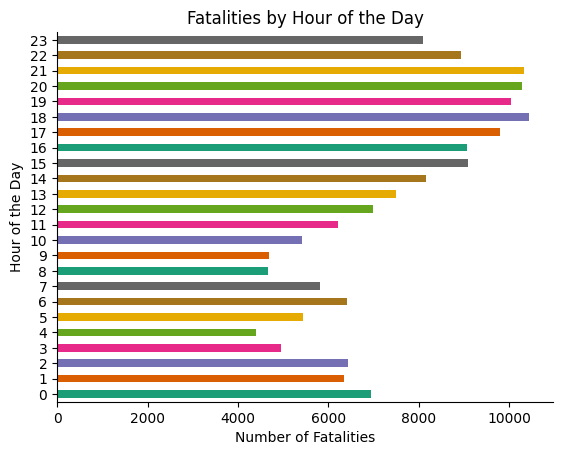

In [ ]:
# Group fatalities by hour of the day
fatalities_by_hour = df.groupby('HOUR')['FATALS'].sum()

# Plotting
fatalities_by_hour.plot(kind='barh', color=sns.color_palette('Dark2'))

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xlabel('Number of Fatalities')
plt.ylabel('Hour of the Day')
plt.title('Fatalities by Hour of the Day')

### Fatalities by State

In [ ]:
df['STATENAME'].nunique()

51

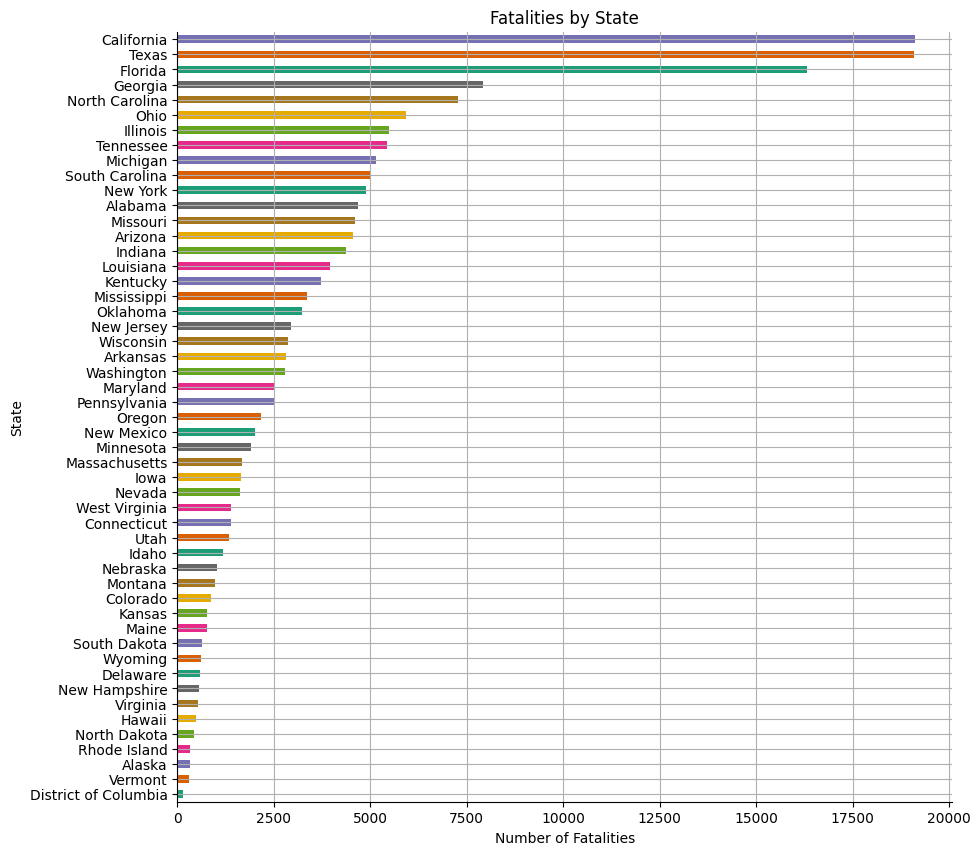

In [ ]:
plt.figure(figsize=(10, 10))
fatalities_by_state = df.groupby('STATENAME')['FATALS'].sum()
fatalities_by_state_sorted = fatalities_by_state.sort_values(ascending=True)
fatalities_by_state_sorted.plot(kind='barh', color=sns.color_palette('Dark2'))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Number of Fatalities')
plt.ylabel('State')
plt.grid()
plt.title('Fatalities by State')

plt.show()

In [ ]:
# Get the count of entries for each state
state_counts = df['STATENAME'].value_counts()

# Filter for California, Texas, and Florida
california_count = state_counts['California']
texas_count = state_counts['Texas']
florida_count = state_counts['Florida']

print("California:", california_count)
print("Texas:", texas_count)
print("Florida:", florida_count)

total = california_count +  florida_count + texas_count
print("\nTotal:", total)

California: 17633
Texas: 17305
Florida: 15166

Total: 50104


### Weather Conditions by NHTSA Region

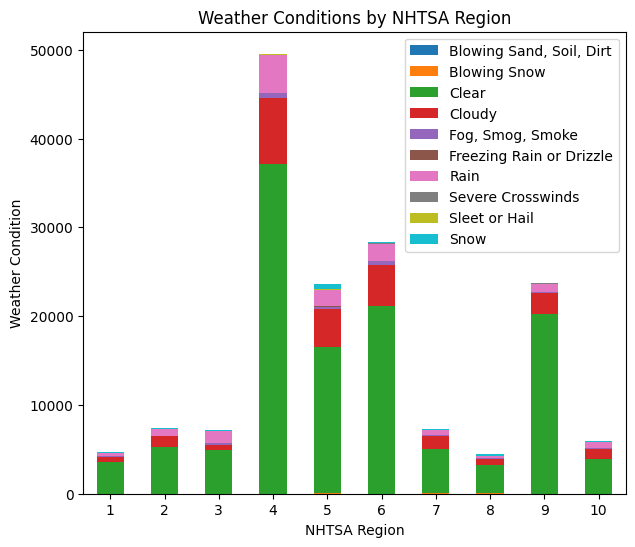

In [ ]:
df.groupby('NHTSA_Region')['WEATHERNAME'].value_counts().unstack().plot.bar(stacked=True)

plt.xlabel('NHTSA Region')
plt.ylabel('Weather Condition')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.title('Weather Conditions by NHTSA Region')

plt.gcf().set_size_inches(7, 6)


WEATHERNAME   Blowing Sand, Soil, Dirt  Blowing Snow     Clear    Cloudy  \
NHTSA_Region                                                               
1                                  NaN      0.000849  0.761622  0.118871   
2                                  NaN      0.000136  0.710616  0.168003   
3                                  NaN      0.001522  0.673308  0.088557   
4                             0.000081      0.000061  0.748880  0.150067   
5                             0.000423      0.001775  0.695338  0.182510   
6                             0.000495      0.000035  0.747792  0.161851   
7                             0.001226      0.002588  0.681150  0.195178   
8                             0.000905      0.009952  0.723140  0.160145   
9                             0.000210      0.000042  0.849689  0.099478   
10                            0.000337      0.001181  0.666723  0.173722   

WEATHERNAME   Fog, Smog, Smoke  Freezing Rain or Drizzle      Rain  \
NHTSA_Region     

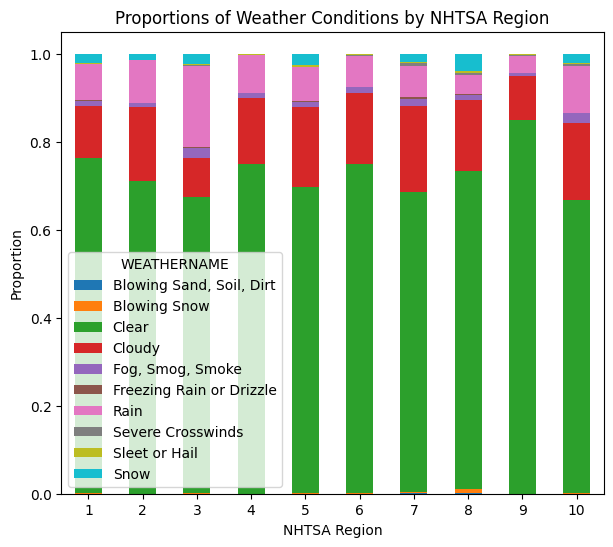

In [ ]:
# Group by NHTSA region and weather condition, then count the occurrences
region_weather_counts = df.groupby('NHTSA_Region')['WEATHERNAME'].value_counts().unstack()

# Convert counts to proportions for each region
region_weather_proportions = region_weather_counts.div(region_weather_counts.sum(axis=1), axis=0)

# Display the proportion table
print(region_weather_proportions)

# Plotting stacked bar chart to visualize the distribution
region_weather_proportions.plot.bar(stacked=True)
plt.xlabel('NHTSA Region')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
#plt.legend(loc='upper right')
plt.title('Proportions of Weather Conditions by NHTSA Region')
plt.gcf().set_size_inches(7, 6)
plt.show()

### Light Conditions by NHTSA Region

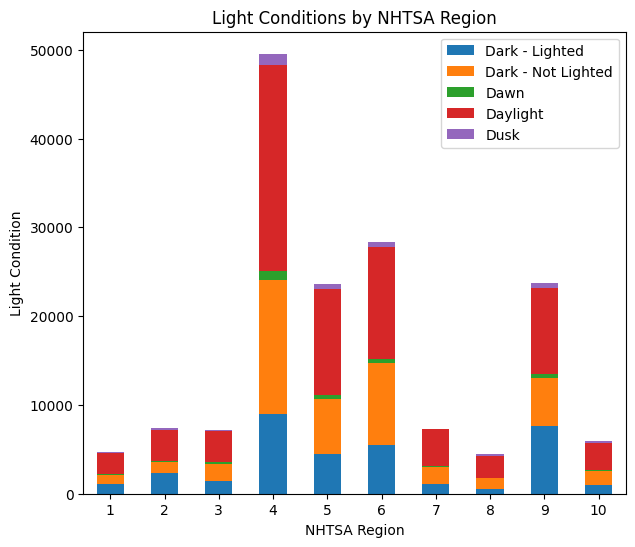

In [ ]:
df.groupby('NHTSA_Region')['LGT_CONDNAME'].value_counts().unstack().plot.bar(stacked=True)

plt.xlabel('NHTSA Region')
plt.ylabel('Light Condition')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.title('Light Conditions by NHTSA Region')

plt.gcf().set_size_inches(7, 6)

LGT_CONDNAME  Dark - Lighted  Dark - Not Lighted      Dawn  Daylight      Dusk
NHTSA_Region                                                                  
1                   0.238378            0.209722  0.017406  0.501167  0.033326
2                   0.313579            0.167460  0.021748  0.470708  0.026505
3                   0.201190            0.267746  0.019233  0.486232  0.025598
4                   0.180859            0.305501  0.020340  0.468017  0.025284
5                   0.189399            0.261127  0.018682  0.504248  0.026544
6                   0.195267            0.324585  0.018050  0.444472  0.017626
7                   0.151049            0.266140  0.012258  0.559112  0.011441
8                   0.111966            0.284325  0.016964  0.556209  0.030536
9                   0.320022            0.227866  0.020746  0.405740  0.025627
10                  0.172373            0.261258  0.023107  0.509023  0.034238


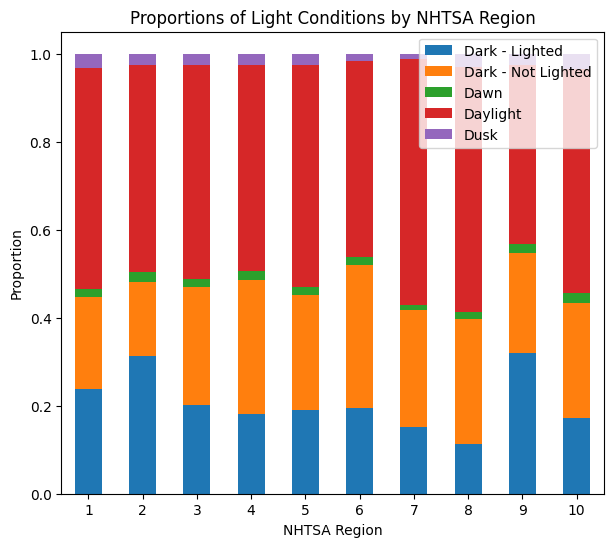

In [ ]:
# Group by NHTSA region and light condition, then count the occurrences
region_light_counts = df.groupby('NHTSA_Region')['LGT_CONDNAME'].value_counts().unstack()

# Convert counts to proportions for each region
region_light_proportions = region_light_counts.div(region_light_counts.sum(axis=1), axis=0)

# Display the proportion table
print(region_light_proportions)

# Plotting stacked bar chart to visualize the distribution
region_light_proportions.plot.bar(stacked=True)
plt.xlabel('NHTSA Region')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.title('Proportions of Light Conditions by NHTSA Region')
plt.gcf().set_size_inches(7, 6)
plt.show()

### Fatalities by Lighting Condition

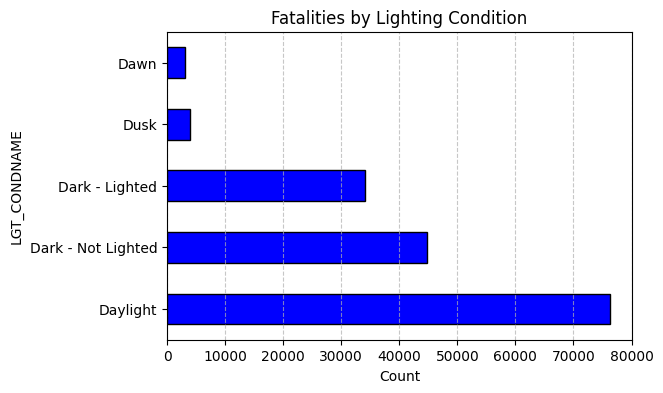

In [ ]:
df['LGT_CONDNAME'].value_counts().plot.barh(color='b', edgecolor='black', figsize=(6, 4))
plt.xlabel('Count')
plt.title('Fatalities by Lighting Condition')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


### Fatalities by Weather Pattern

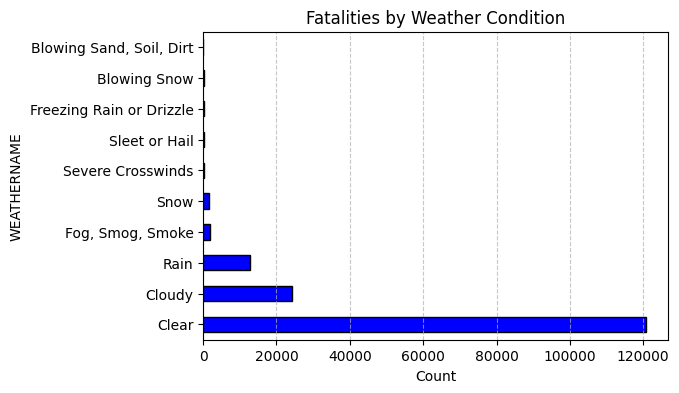

In [ ]:
df['WEATHERNAME'].value_counts().plot.barh(color='b', edgecolor='black', figsize=(6, 4))
plt.xlabel('Count')
plt.title('Fatalities by Weather Condition')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


### Latitude vs. Longitude

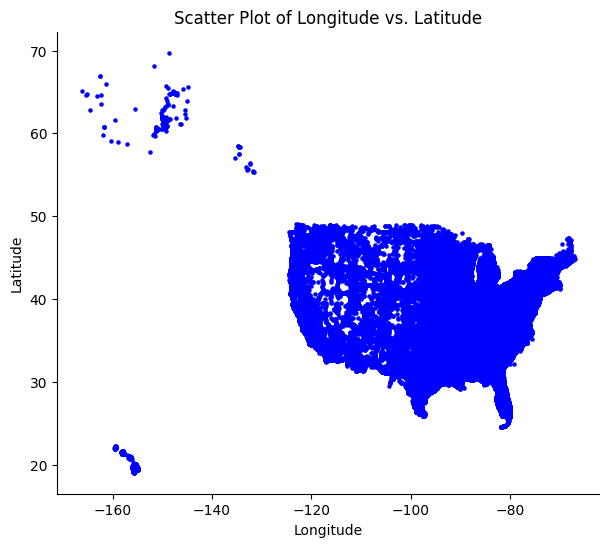

In [ ]:
plt.figure(figsize=(7, 6))
plt.scatter(df['LONGITUDE'], df['LATITUDE'], s=5, alpha=1, color='b')

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Longitude vs. Latitude')
plt.show()

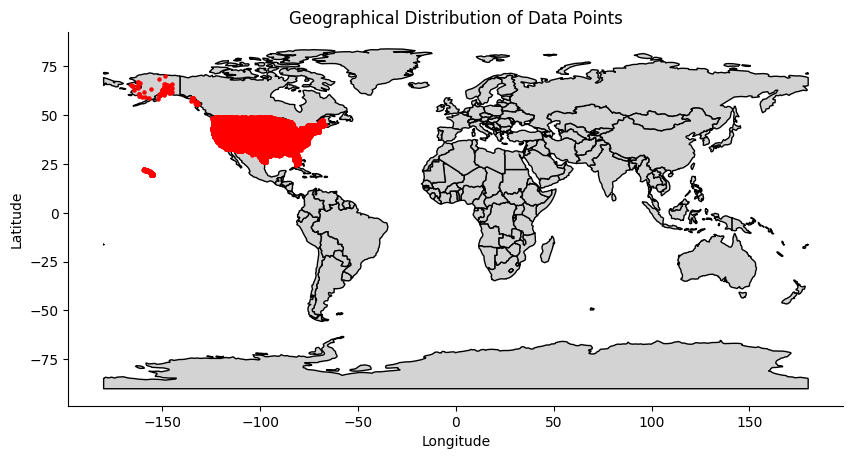

In [ ]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.LONGITUDE, df.LATITUDE))
world.plot(figsize=(10, 8), color='lightgrey', edgecolor='black')

gdf.plot(ax=plt.gca(), color='red', markersize=5, alpha=1)

plt.title('Geographical Distribution of Data Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


## Interaction Terms (weather patterns & light conditions)

### Frequency Analysis

In [ ]:
# Extract unique categorical values for light conditions and weather patterns from the DataFrame
light_conditions = df['LGT_CONDNAME'].unique().tolist()
weather_patterns = df['WEATHERNAME'].unique().tolist()

# Create interaction terms by combining light conditions and weather patterns
interaction_terms = [(lgt_cond, weather, df[df['LGT_CONDNAME'] == lgt_cond][df['WEATHERNAME'] == weather]['FATALS'].sum())
                      for lgt_cond in light_conditions for weather in weather_patterns]

# Create a DataFrame to store the interaction terms
interaction_df = pd.DataFrame(interaction_terms, columns=['LGT_CONDNAME', 'WEATHERNAME', 'FATALS'])

# Display first 5 rows of interaction_df
interaction_df.head()


,LGT_CONDNAME,WEATHERNAME,FATALS
0,Dark - Not Lighted,Rain,4256
1,Dark - Not Lighted,Clear,35320
2,Dark - Not Lighted,Cloudy,7404
3,Dark - Not Lighted,"Fog, Smog, Smoke",1126
4,Dark - Not Lighted,Severe Crosswinds,68


In [ ]:
# Perform frequency analysis for each interaction term
interaction_freq = df.groupby(['LGT_CONDNAME', 'WEATHERNAME']).size().reset_index(name='Frequency')

# Sort interaction terms by frequency in descending order
interaction_freq = interaction_freq.sort_values(by='Frequency', ascending=False)

# Display results (top 12 combinations)
interaction_freq.head(12)

,LGT_CONDNAME,WEATHERNAME,Frequency
32,Daylight,Clear,57232
12,Dark - Not Lighted,Clear,32327
2,Dark - Lighted,Clear,26205
33,Daylight,Cloudy,12066
13,Dark - Not Lighted,Cloudy,6820
36,Daylight,Rain,5302
3,Dark - Lighted,Cloudy,4224
16,Dark - Not Lighted,Rain,3919
6,Dark - Lighted,Rain,3038
42,Dusk,Clear,2970


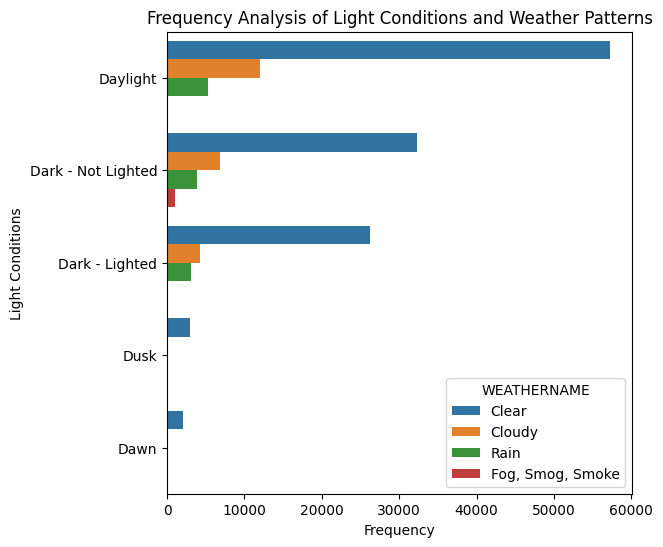

In [ ]:
# Plot the distribution of interaction terms (top 12 only)
plt.figure(figsize=(6, 6))
sns.barplot(x='Frequency', y='LGT_CONDNAME', hue='WEATHERNAME', data=interaction_freq.head(12))
plt.title('Frequency Analysis of Light Conditions and Weather Patterns')
plt.xlabel('Frequency')
plt.ylabel('Light Conditions')
plt.show()

### Visualizations - interactions

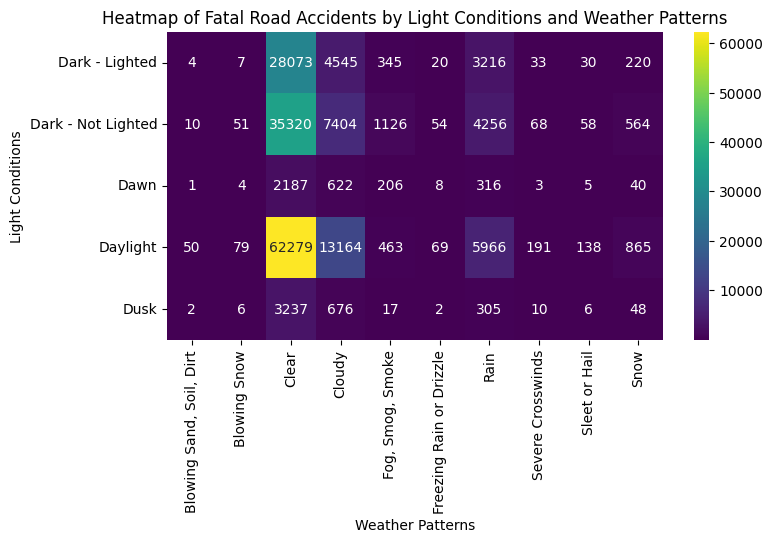

In [ ]:
# Pivot the DataFrame to create a heatmap
heatmap_data = df.pivot_table(index='LGT_CONDNAME',
                              columns='WEATHERNAME', values='FATALS', aggfunc='sum')

# Plot the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='g')
plt.title('Heatmap of Fatal Road Accidents by Light Conditions and Weather Patterns')
plt.xlabel('Weather Patterns')
plt.ylabel('Light Conditions')
plt.show()

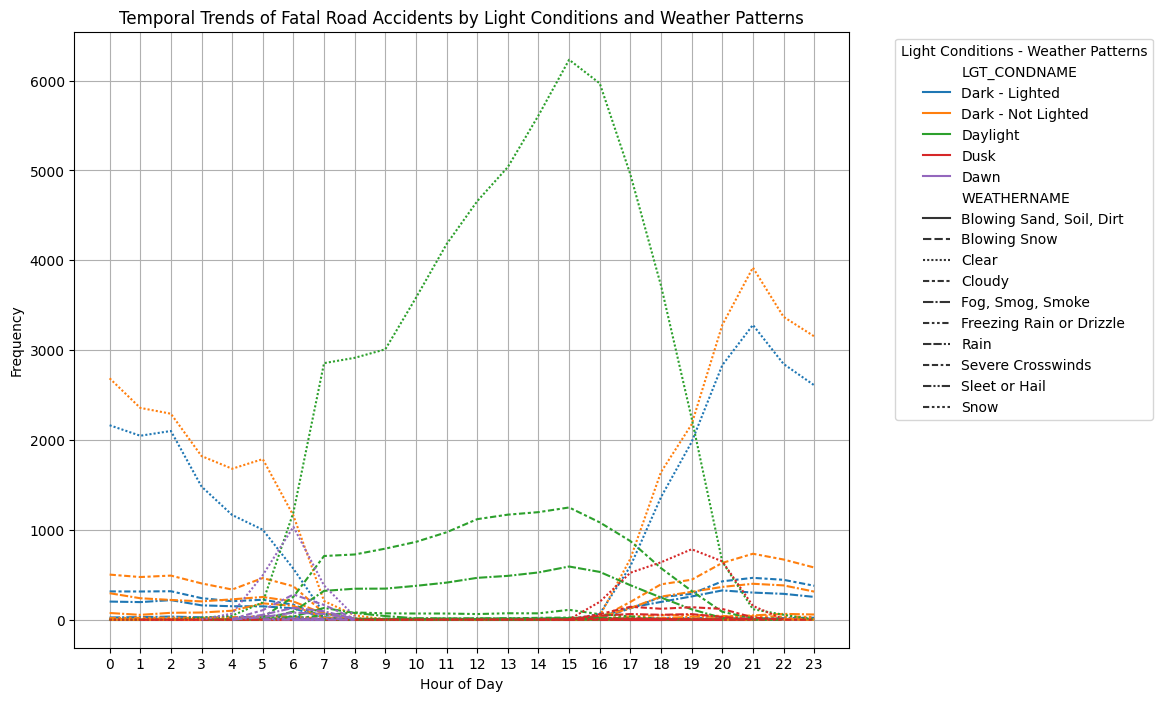

In [ ]:
# Group the data by hour of the day to analyze temporal trends
hourly_data = df.groupby(['HOUR', 'LGT_CONDNAME', 'WEATHERNAME']).size().reset_index(name='Frequency')

# Visualize temporal trends using a line plot
plt.figure(figsize=(10, 8))
sns.lineplot(x='HOUR', y='Frequency', hue='LGT_CONDNAME', style='WEATHERNAME', data=hourly_data)
plt.title('Temporal Trends of Fatal Road Accidents by Light Conditions and Weather Patterns')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.xticks(range(24))
plt.legend(title='Light Conditions - Weather Patterns', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### Geospatial Clustering

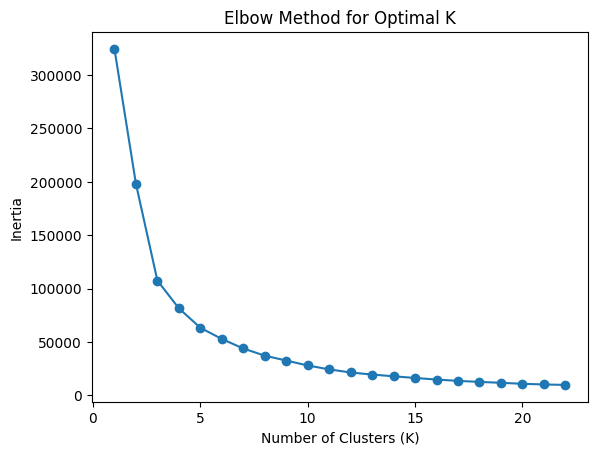

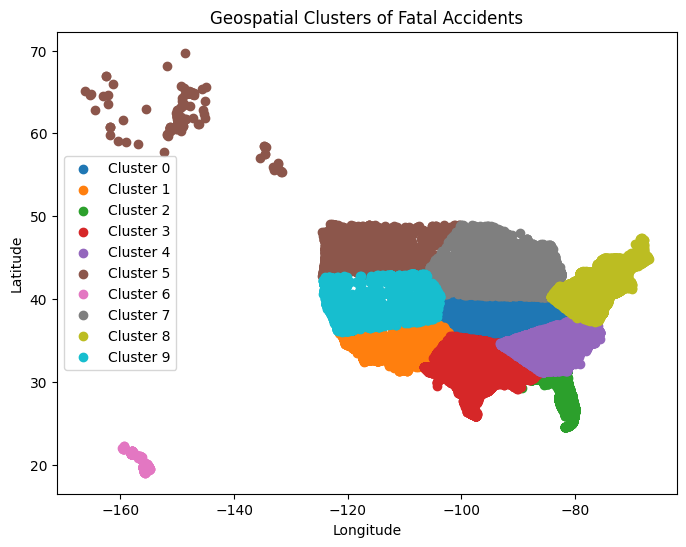

In [ ]:
from sklearn.cluster import KMeans

# Select latitude and longitude columns
coordinates = df[['LATITUDE', 'LONGITUDE']]

# Standardize data
coordinates_standardized = (coordinates - coordinates.mean()) / coordinates.std()

# Optimal number of clusters (K) - the elbow method
inertia = []
for k in range(1, 23):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(coordinates_standardized)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 23), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# I will choose K=10
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(coordinates_standardized)

# Add cluster labels to the DataFrame
df['CLUSTER'] = kmeans.labels_

# Visualize clusters on a map
plt.figure(figsize=(8, 6))
for cluster_label in range(10):
    cluster_points = coordinates[df['CLUSTER'] == cluster_label]
    plt.scatter(cluster_points['LONGITUDE'], cluster_points['LATITUDE'], label=f'Cluster {cluster_label}')
plt.title('Geospatial Clusters of Fatal Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

## Feature Importance

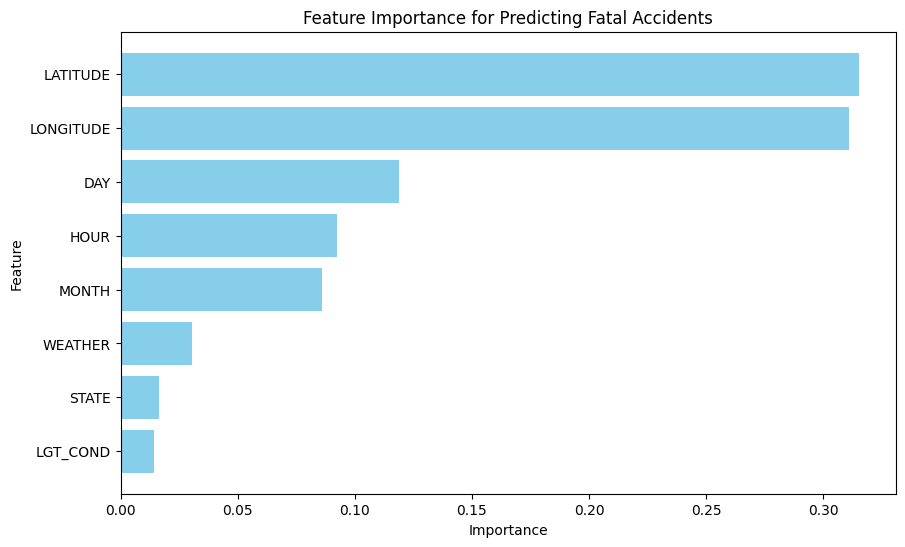

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define features (X) and target variable (y)
X = dfs[['STATE', 'STATE', 'LATITUDE', 'LONGITUDE', 'LGT_COND',
         'WEATHER', 'MONTH', 'DAY', 'HOUR']]

y = dfs['FATALS']

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the data
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Predicting Fatal Accidents')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.show()